In [4]:
import pandas as pd

df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})
df = df.reset_index()  # make sure indexes pair with number of rows

for index, row in df.iterrows():
    print(row['c1'], row['c2'])

10 100
11 110
12 120


In [12]:
df_asset = pd.read_parquet(f'../sectors/QQQ_daily.parquet')
df_asset

,open,high,low,close,adj close,volume,symbol
Date,,,,,,,
2014-11-11,101.980003,102.279999,101.699997,102.279999,94.455009,15454000,QQQ
2014-11-12,101.870003,102.570000,101.870003,102.459999,94.621254,22050300,QQQ
2014-11-13,102.650002,103.279999,102.419998,102.900002,95.027580,28027800,QQQ
2014-11-14,102.870003,103.220001,102.529999,103.220001,95.323128,19251300,QQQ
2014-11-17,102.980003,103.209999,102.419998,102.910004,95.036842,23361600,QQQ
...,...,...,...,...,...,...,...
2024-11-01,485.500000,490.750000,485.200012,487.429993,487.429993,33655800,QQQ
2024-11-04,486.820007,489.380005,484.250000,486.010010,486.010010,23291600,QQQ
2024-11-05,487.609985,492.880005,487.519989,492.209991,492.209991,24353600,QQQ


In [13]:
def calc_returns(srs: pd.Series, day_offset: int = 1) -> pd.Series:
    """for each element of a pandas time-series srs,
    calculates the returns over the past number of days
    specified by offset

    Args:
        srs (pd.Series): time-series of prices
        day_offset (int, optional): number of days to calculate returns over. Defaults to 1.

    Returns:
        pd.Series: series of returns
    """
    returns = srs / srs.shift(day_offset) - 1.0
    return returns

df_asset["daily_returns"] = calc_returns(df_asset["close"])

df_asset

,open,high,low,close,adj close,volume,symbol,daily_returns
Date,,,,,,,,
2014-11-11,101.980003,102.279999,101.699997,102.279999,94.455009,15454000,QQQ,NaN
2014-11-12,101.870003,102.570000,101.870003,102.459999,94.621254,22050300,QQQ,0.001760
2014-11-13,102.650002,103.279999,102.419998,102.900002,95.027580,28027800,QQQ,0.004294
2014-11-14,102.870003,103.220001,102.529999,103.220001,95.323128,19251300,QQQ,0.003110
2014-11-17,102.980003,103.209999,102.419998,102.910004,95.036842,23361600,QQQ,-0.003003
...,...,...,...,...,...,...,...,...
2024-11-01,485.500000,490.750000,485.200012,487.429993,487.429993,33655800,QQQ,0.007399
2024-11-04,486.820007,489.380005,484.250000,486.010010,486.010010,23291600,QQQ,-0.002913
2024-11-05,487.609985,492.880005,487.519989,492.209991,492.209991,24353600,QQQ,0.012757


In [17]:
VOL_LOOKBACK = 60  # for ex-ante volatility

def calc_daily_vol(daily_returns):
    return (
        daily_returns.ewm(span=VOL_LOOKBACK, min_periods=VOL_LOOKBACK)
        .std()
        .fillna(method="bfill")
    )

df_asset["daily_vol"] = calc_daily_vol(df_asset["daily_returns"])
df_asset

,open,high,low,close,adj close,volume,symbol,daily_returns,daily_vol
Date,,,,,,,,,
2014-11-11,101.980003,102.279999,101.699997,102.279999,94.455009,15454000,QQQ,NaN,0.010042
2014-11-12,101.870003,102.570000,101.870003,102.459999,94.621254,22050300,QQQ,0.001760,0.010042
2014-11-13,102.650002,103.279999,102.419998,102.900002,95.027580,28027800,QQQ,0.004294,0.010042
2014-11-14,102.870003,103.220001,102.529999,103.220001,95.323128,19251300,QQQ,0.003110,0.010042
2014-11-17,102.980003,103.209999,102.419998,102.910004,95.036842,23361600,QQQ,-0.003003,0.010042
...,...,...,...,...,...,...,...,...,...
2024-11-01,485.500000,490.750000,485.200012,487.429993,487.429993,33655800,QQQ,0.007399,0.011437
2024-11-04,486.820007,489.380005,484.250000,486.010010,486.010010,23291600,QQQ,-0.002913,0.011264
2024-11-05,487.609985,492.880005,487.519989,492.209991,492.209991,24353600,QQQ,0.012757,0.011301


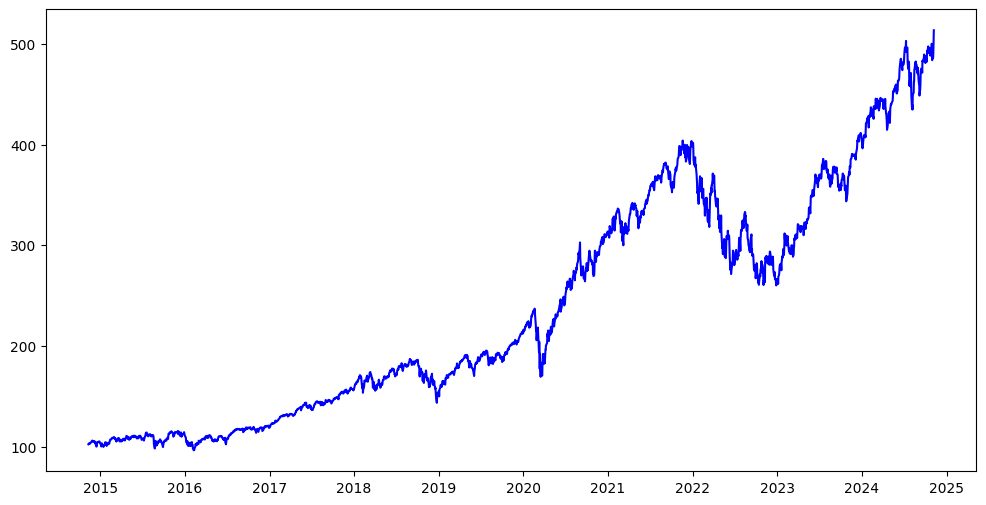

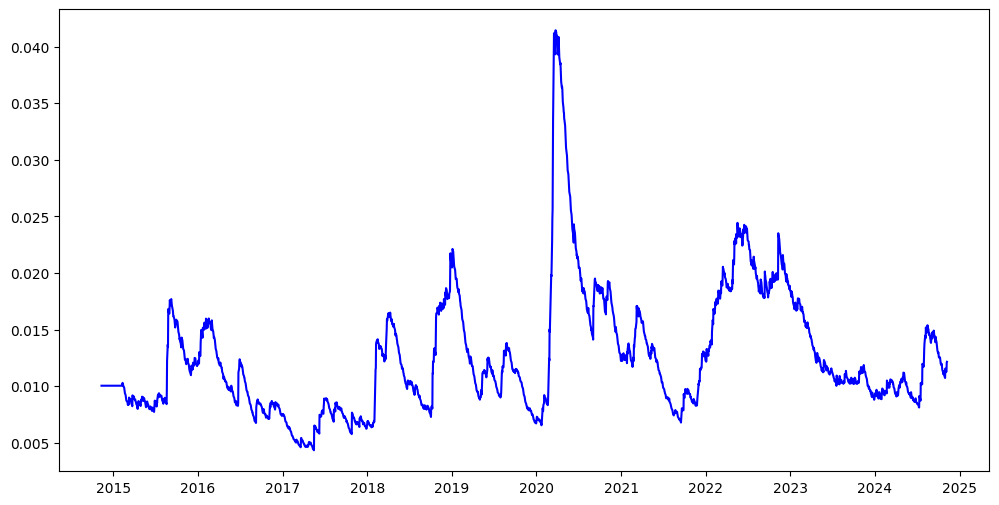

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df_asset.index, df_asset['close'], 'b-');
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_asset.index, df_asset['daily_vol'], 'b-');
plt.show()



In [10]:
import pandas as pd
raw_data = pd.read_csv("../data/quandl_cpd_nonelbw.csv", index_col=0, parse_dates=True)
raw_data["date"] = raw_data["date"].astype("datetime64[ns]")
#raw_data.info()
print(raw_data['daily_returns'])
print(raw_data['target_returns'])

Date
2015-11-12   -0.009722
2015-11-13   -0.019636
2015-11-16    0.014385
2015-11-17    0.000628
2015-11-18    0.019195
                ...   
2024-10-31   -0.015304
2024-11-01    0.016253
2024-11-04   -0.003448
2024-11-05    0.017703
2024-11-06    0.031981
Name: daily_returns, Length: 28259, dtype: float64
Date
2015-11-12   -0.015535
2015-11-13    0.011038
2015-11-16    0.000480
2015-11-17    0.014905
2015-11-18    0.000536
                ...   
2024-10-31    0.013122
2024-11-01   -0.002751
2024-11-04    0.014323
2024-11-05    0.025461
2024-11-06    0.009419
Name: target_returns, Length: 28259, dtype: float64
